In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'threads': [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'x': [1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000,1000, 1000, 1000, 10000, 10000, 10000, 100000, 100000, 100000],
    'y': [1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000,1000, 10000, 100000, 1000, 10000, 100000, 1000, 10000, 100000],
    'real_time': [0.192, 0.877, 8.007, 0.860, 7.202, 72.957, 7.382, 73.979, 103.771, 0.122, 0.553, 4.934, 0.603, 4.885, 49.336, 5.501, 50.027, 69.874, 0.155, 0.430, 3.764, 0.480, 3.510, 33.875, 3.722, 35.815, 48.868, 0.073, 0.437, 3.338, 0.435, 3.642, 32.484, 3.767, 33.476, 48.659] 
}

df = pd.DataFrame(data)

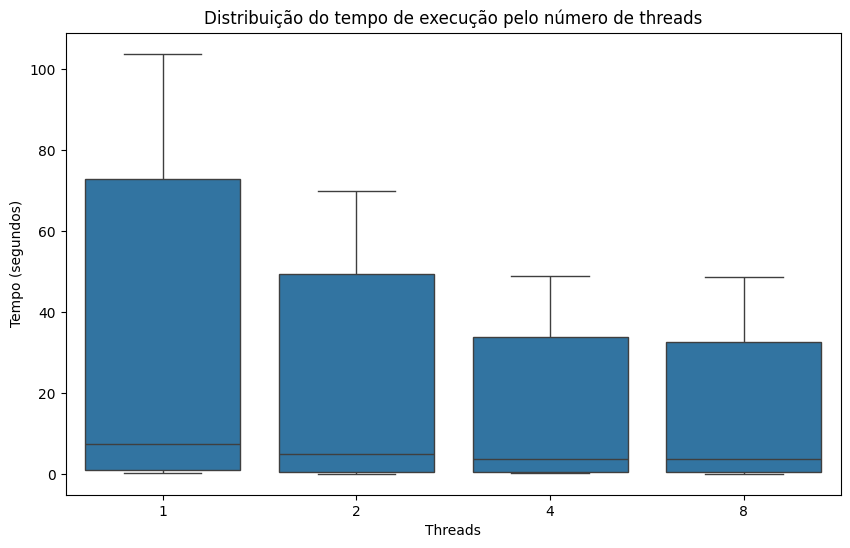

In [3]:
# 4. Violinplot - Distribuição dos tempos de execução
plt.figure(figsize=(10,6))
bp = sns.boxplot(x='threads', y='real_time', data=df)
bp.set(ylabel="Tempo (segundos)", xlabel="Threads")
plt.title('Distribuição do tempo de execução pelo número de threads')
plt.show
plt.savefig('violinplot.png')

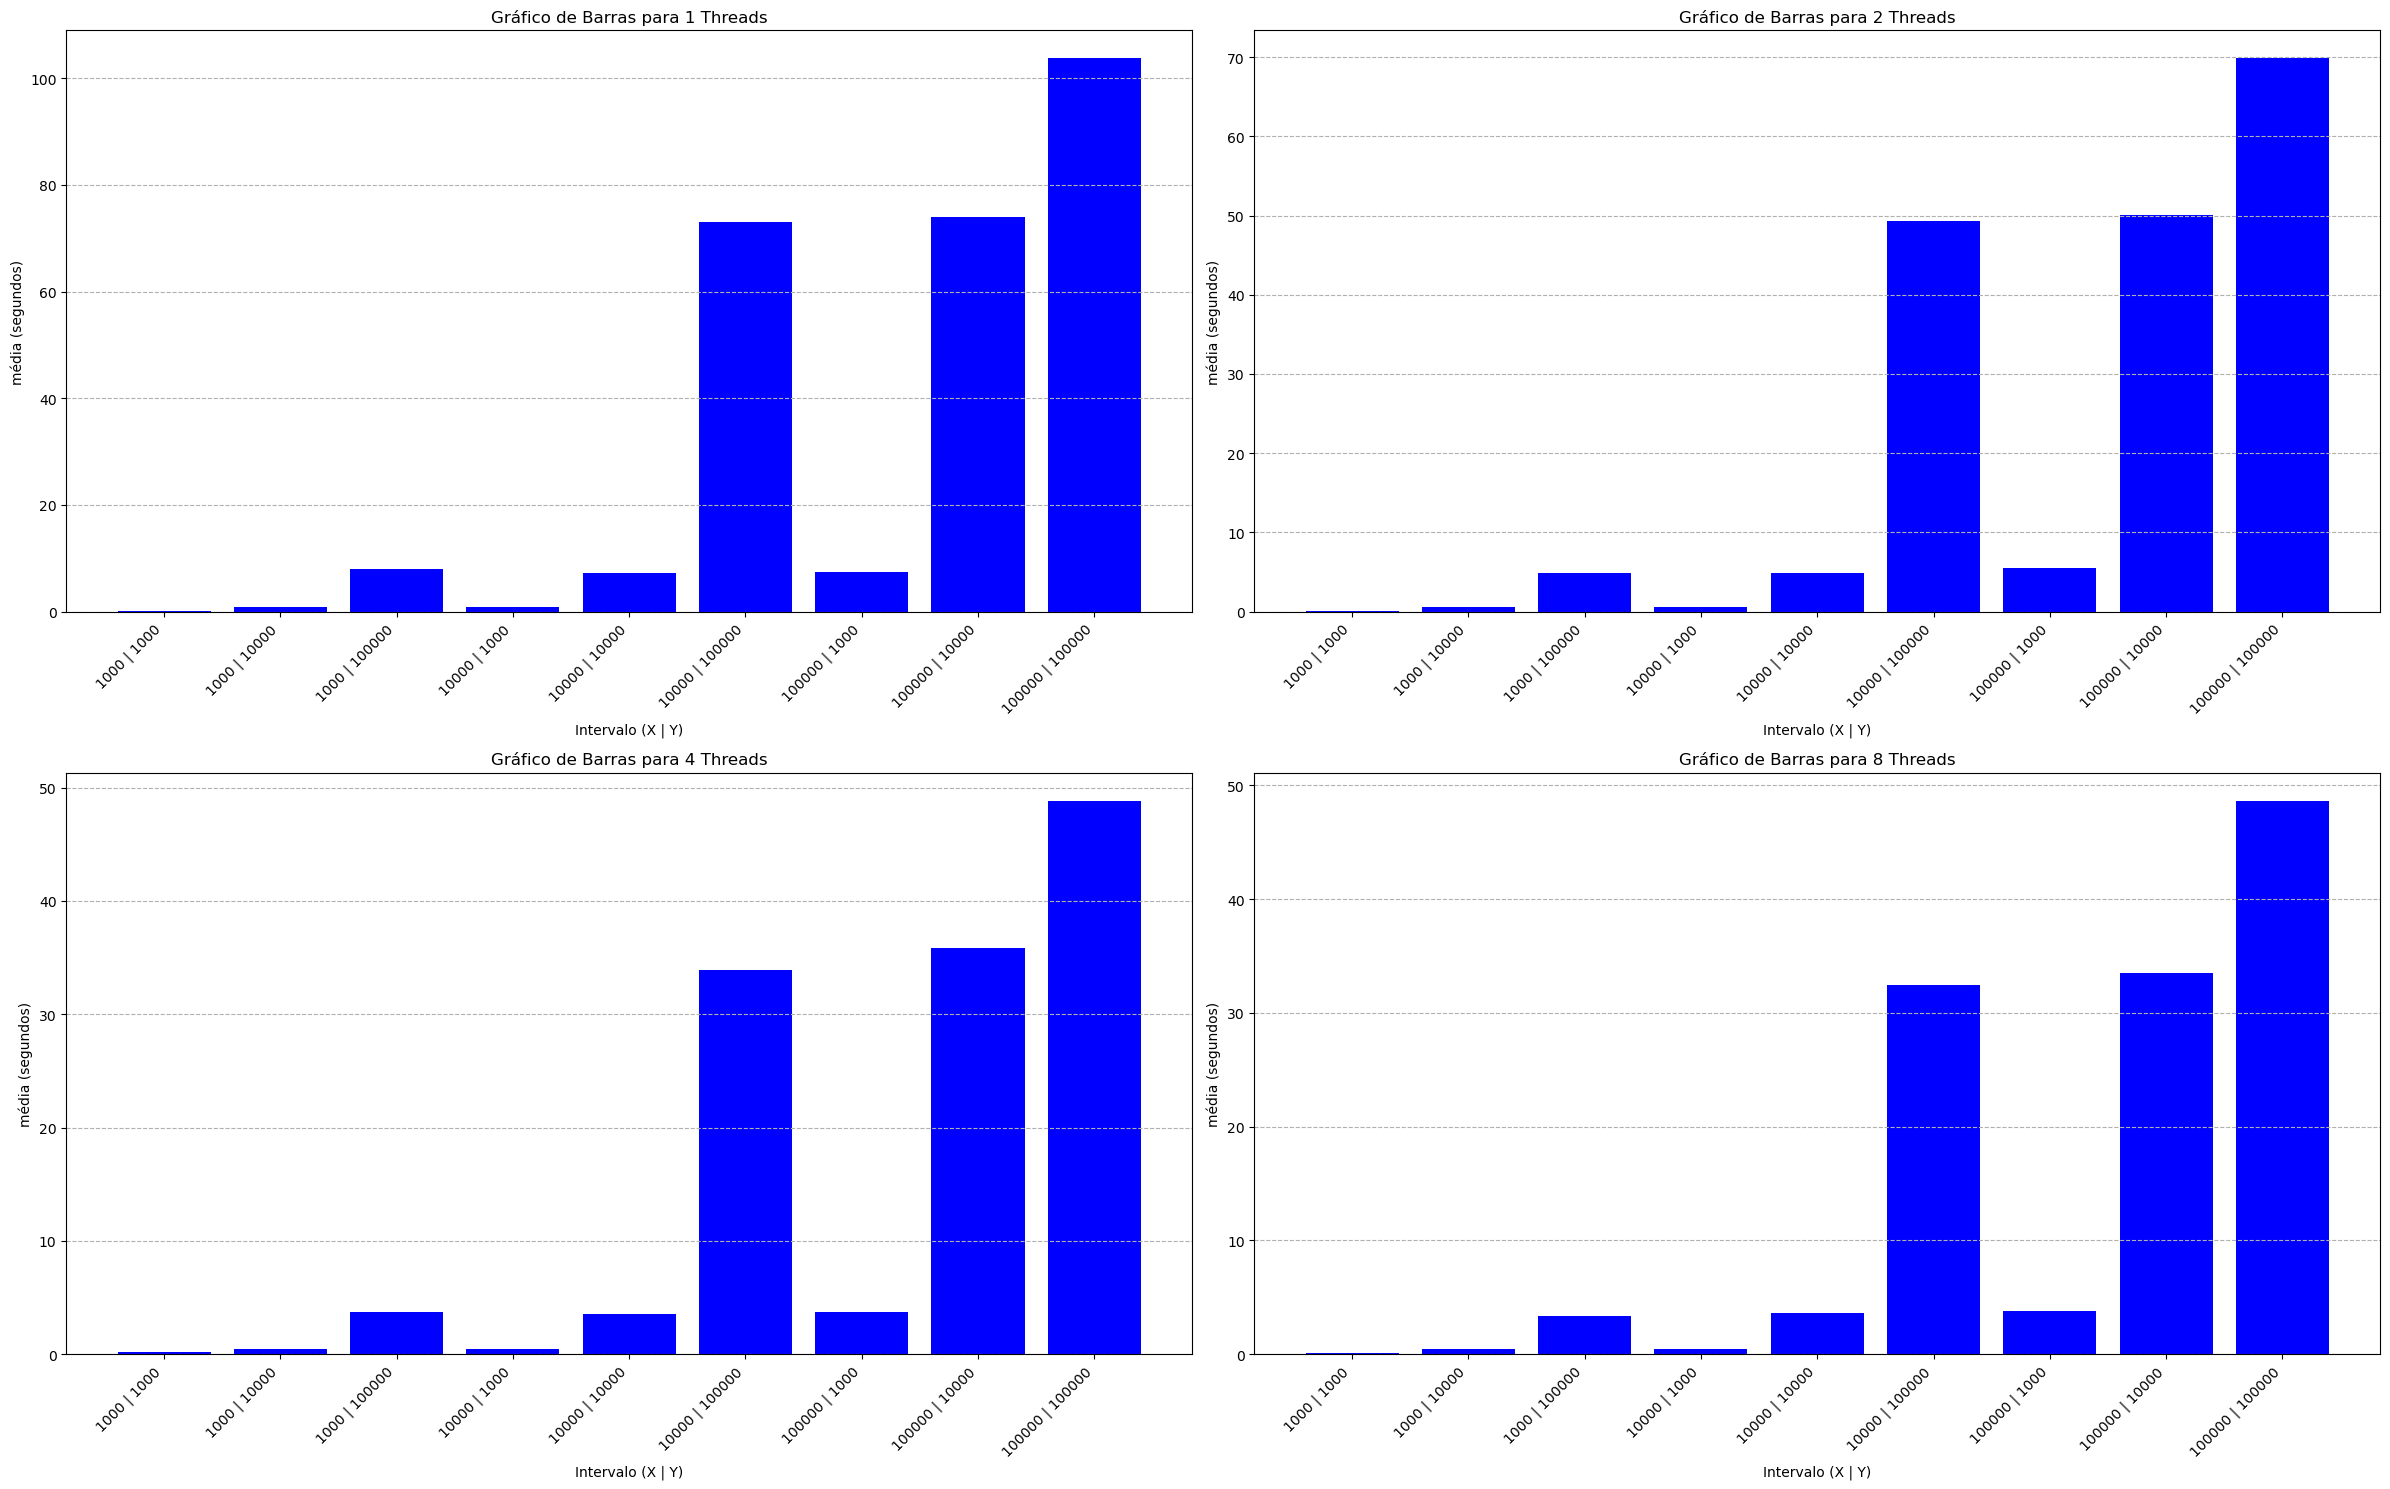

In [44]:
# Definindo o layout da grade 2x2
fig, axes = plt.subplots(2, 2, figsize=(24, 15))  # 2 linhas, 2 colunas

# Lista de threads para iterar
threads = [1, 2, 4, 8]

# Iterando pelos threads e plotando os gráficos
for i, thread in enumerate(threads):
    row = i // 2  # Calculando a linha da grade
    col = i % 2   # Calculando a coluna da grade
    ax = axes[row, col]  # Obtendo o subplot correspondente

    # Filtrando os dados para o thread atual
    df_thread = df[df['threads'] == thread].copy()

    # Criando rótulos para o eixo X
    df_thread.loc[:, 'intervalo'] = df_thread['x'].astype(str) + ' | ' + df_thread['y'].astype(str)

    # Criando o gráfico de barras no subplot
    ax.bar(df_thread['intervalo'], df_thread['real_time'], color='blue')

    # Configurando o gráfico
    ax.set_title(f'Gráfico de Barras para {thread} Threads')
    ax.set_xlabel('Intervalo (X | Y)')
    ax.set_ylabel('média (segundos)')
    ax.tick_params(axis='x', rotation=45)  # Rotacionando os rótulos do eixo X

    # Alinhando os rótulos dos ticks à direita
    for label in ax.get_xticklabels():
        label.set_ha('right')

    ax.grid(axis='y', linestyle='--')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show
plt.savefig('graficos_barras.png')

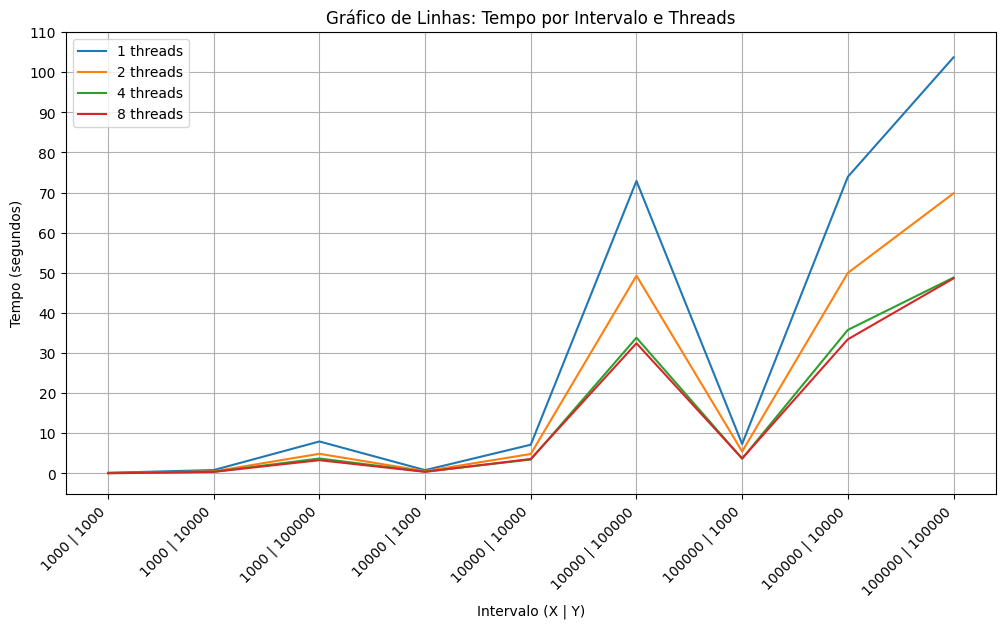

In [4]:
# Criando rótulos para o eixo X
df['intervalo'] = df['x'].astype(str) + ' | ' + df['y'].astype(str)

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
for thread in df['threads'].unique():
    df_thread = df[df['threads'] == thread]
    plt.plot(df_thread['intervalo'], df_thread['real_time'], label=f'{thread} threads')

# Configurando o gráfico
plt.title('Gráfico de Linhas: Tempo por Intervalo e Threads')
plt.xlabel('Intervalo (X | Y)')
plt.ylabel('Tempo (segundos)')
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo X

# Definindo os ticks do eixo Y manualmente com np.arange()
min_time = df['real_time'].min()
max_time = df['real_time'].max()
plt.yticks(np.arange(min_time, max_time + 10, 10))  # Cria ticks de 10 em 10

plt.legend(loc='best')  # Adicionando legenda
plt.grid(True)  # Adicionando grade

plt.show
plt.savefig('grafico_linhas.png')